<a href="https://colab.research.google.com/github/Pramod-rr/Handwritten-Recognition/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load the data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


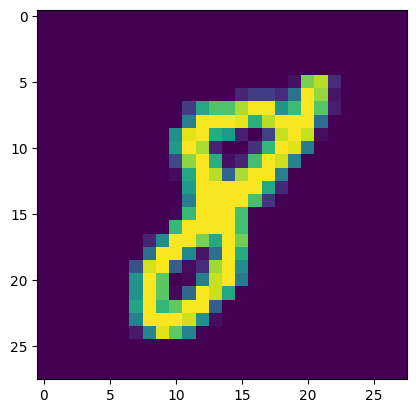

In [3]:
plt.imshow(x_train[17]) #display the 17th number

In [4]:
y_train[17]

8

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
#reshape the dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

In [7]:
#one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [9]:
input_shape = (28,28,1)

#create the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1) # train the model

model.save('model_mnist.h5')
print('Model saved')

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8293 - loss: 0.5475 - val_accuracy: 0.9833 - val_loss: 0.0560
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9751 - loss: 0.0802 - val_accuracy: 0.9865 - val_loss: 0.0468
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9905 - val_loss: 0.0334
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9910 - val_loss: 0.0335
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9910 - val_loss: 0.0332
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9902 - val_loss: 0.0335
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0265 - val_accuracy: 0.9928 - val_loss: 0.0274
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 

Model saved


In [11]:
#evaluate the model
accuracy = model.evaluate(x_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9896 - loss: 0.0293
Test loss: 0.024121113121509552
Test accuracy: 0.9922999739646912


In [12]:
prediction = model.predict(x_test[:5]) # predict thr first 5 test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [13]:
prediction_classes = np.argmax(prediction, axis=1)+1 # get the prediction classes
prediction_classes

array([8, 3, 2, 1, 5])

In [14]:
actual_classes = np.argmax(y_test[:5], axis=1)+1 # get the actual classes
actual_classes

array([8, 3, 2, 1, 5])